In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Anything for Money,1967
1,El factor Pilgrim,2000
2,Unleashed,1997
3,Mia mana katigoreitai,1972
4,Beer for My Horses,2008


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [7]:
t = titles
c = cast

In [19]:
common = t.title.value_counts().head(10)
common

Hamlet                  20
Carmen                  16
Macbeth                 15
Maya                    12
The Outsider            12
Othello                 11
Temptation              11
Kismet                  11
The Three Musketeers    11
Anna Karenina           10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [16]:
year = t[t.year //10 == 193]
year.year.value_counts().head(3)

1937    1198
1936    1138
1938    1129
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

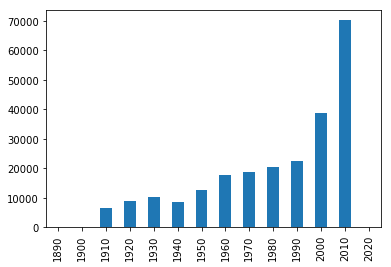

In [22]:
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')


### Plot the number of "Hamlet" films made each decade.

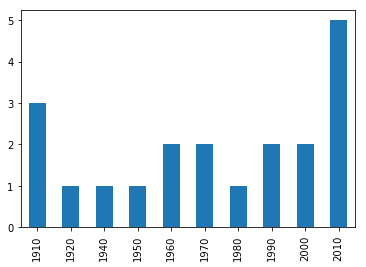

In [24]:
movie = t[t.title == "Hamlet"]
(movie.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

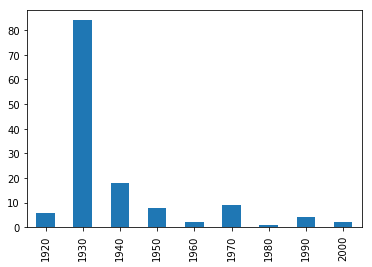

In [26]:
character = c[c.character == "Rustler"]
(character.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

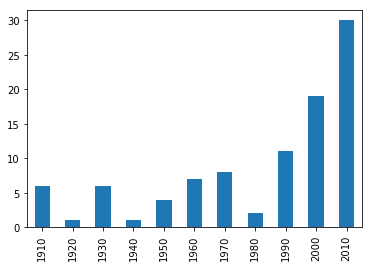

In [27]:
character = c[c.character == "Hamlet"]
(character.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [28]:
common = c.character.value_counts().head(10)
common

Himself        19758
Dancer         12118
Extra          11131
Reporter        8210
Doctor          7488
Student         7285
Policeman       6909
Party Guest     6866
Nurse           6727
Bartender       6666
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [29]:
character = c[c.character == "Herself"]
search = character.name.value_counts().head(10)
search

Queen Elizabeth II                  11
Margaret Thatcher                    9
Joyce Brothers                       9
Mary Jo Pehl                         7
Hillary Clinton                      7
Marilyn Monroe                       6
Joan Rivers                          6
Sumie Sakai                          6
Caroline Rhea                        5
Queen Elizabeth the Queen Mother     5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [30]:
character = c[c.character == "Himself"]
search = character.name.value_counts().head(10)
search

Adolf Hitler          100
Richard Nixon          46
Ronald Reagan          40
John F. Kennedy        37
Winston Churchill      24
George W. Bush         23
Benito Mussolini       23
Ron Jeremy             23
Martin Luther King     22
Bill Clinton           22
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [31]:
year = c[c.year == 1945]
search = year.name.value_counts().head(10)
search

Emmett Vogan       39
Sam (II) Harris    32
Harold Miller      29
Bess Flowers       29
Frank O'Connor     27
Nolan Leary        27
Franklyn Farnum    26
Larry Steers       25
Herman Hack        24
Edmund Cobb        24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [32]:
year = c[c.year == 1985]
search = year.name.value_counts().head(10)
search

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Raj Babbar       15
Lou Scheimer     15
Mohanlal         15
Aruna Irani      15
Om Shivpuri      13
Rajesh Khanna    13
Deven Verma      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

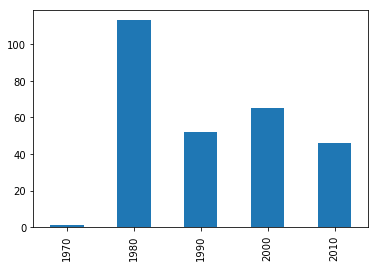

In [35]:
actor = c[c.name == "Mammootty"]
(actor.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [40]:
search = c[c.character.str.startswith("Patron in ")].character.value_counts().head(10)
search

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Restaurant             4
Patron in restaurant             4
Patron in Bar                    4
Patron in Club                   3
Patron in cabaret                3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [41]:
search = c[c.character.str.startswith("Science ")].character.value_counts().head(10)
search

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Reporter         5
Science Promo Cadet      5
Science Kid              5
Science Club Member      5
Science teacher          3
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

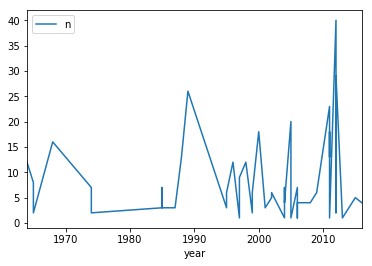

In [54]:
actor = c[c.name == 'Judi Dench'].sort_values(by='year')
n = actor[actor.n.notnull()]
n.plot(x='year', y='n', kind='line')

### Plot the n-values of Cary Grant's roles through his career.

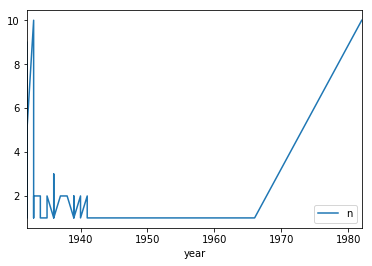

In [55]:
actor = c[c.name == 'Cary Grant'].sort_values(by='year')
n = actor[actor.n.notnull()]
n.plot(x='year', y='n', kind='line')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

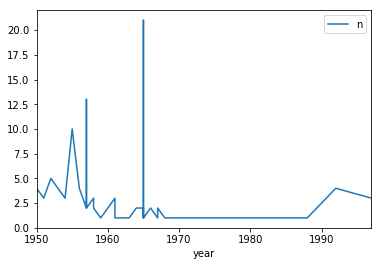

In [56]:
actor = c[c.name == 'Sidney Poitier'].sort_values(by='year')
n = actor[actor.n.notnull()]
n.plot(x='year', y='n', kind='line')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [59]:
year = c[c.year //10 == 195 ]
n= year[year.n == 1]
n.type.value_counts()

actor      6634
actress    2978
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [60]:
year = c[c.year //10 == 195 ]
n= year[year.n == 2]
n.type.value_counts()

actor      4584
actress    4572
Name: type, dtype: int64